In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

os.getcwd()
os.chdir("/content/drive/MyDrive/Learning/bigspring_assignment/twitter_cs/")


In [4]:
import os
os.getcwd()

'/content/drive/MyDrive/Learning/bigspring_assignment/twitter_cs'

In [5]:
query_df=pd.read_excel("final_cleaned_filtered.xlsx")
query_df=query_df[~pd.isnull(query_df["text"])]
query_df=query_df.set_index("tweet_id")
query_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783574 entries, 8 to 2987950
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   author_id        783574 non-null  int64 
 1   text             783574 non-null  object
 2   followup         783544 non-null  object
 3   solution         226228 non-null  object
 4   customer_handle  783574 non-null  object
dtypes: int64(1), object(4)
memory usage: 35.9+ MB


In [6]:
categorywise_count = query_df.groupby("customer_handle").author_id.count().sort_values(ascending=False)

In [7]:
categorywise_count.values

array([80491, 80005, 41603, 28061, 25821, 25818, 23481, 22329, 21332,
       18255, 16489, 16267, 15131, 14763, 14415, 14126, 13126, 13056,
       12072, 11069, 10864, 10733, 10522, 10059,  9372,  9329,  8689,
        8072,  8054,  7848,  7352,  7294,  6638,  6396,  6395,  6233,
        5962,  5944,  5807,  5701,  5523,  5500,  5075,  5027,  4779,
        4322,  3941,  3936,  3804,  3318,  3279,  3193,  3135,  3132,
        3091,  3001,  2983,  2923,  2730,  2344,  2262,  2083,  2002,
        1966,  1935,  1931,  1868,  1723,  1549,  1520,  1490,  1487,
        1431,  1243,  1239,  1152,   994,   977,   900,   898,   831,
         795,   777,   704,   701,   682,   653,   584,   541,   539,
         521,   513,   504,   480,   471,   463,   436,   388,   366,
         350,   342,   319,   222,   197,   171,   150,   123,    91])

In [8]:
categorywise_count.shape

(108,)

In [9]:
query_df.head()

,author_id,text,followup,solution,customer_handle
tweet_id,,,,,
8,115712,is the worst customer service,i would love the chance to review the account...,". can you please send us a private message, s...",sprintcare
18,115713,you all lie about your great connection. 5 bar...,h there! we would definitely like to work wit...,. we understand your concerns and we would li...,sprintcare
20,115715,"whenever i contact customer support, they tell...",please send me a private message so that i ca...,NaN,sprintcare
29,115716,actually that is a broken link you sent me and...,the information pertaining to the account ass...,. what information is incorrect? ^jk. our de...,Ask_Spectrum
31,115717,yo your customer service reps are super nice ...,"hello, my apologies for any frustrations or i...",NaN,Ask_Spectrum


In [10]:
new_df = query_df.text.fillna('') + query_df.followup.fillna('') + query_df.solution.fillna('')
new_df.name="text"
new_df=new_df.to_frame()

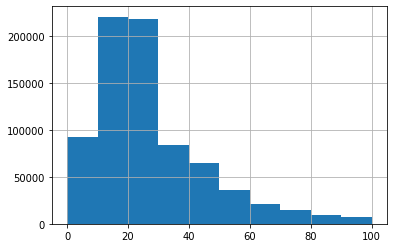

In [11]:
#query word size in general
query_df.text.str.split().map(lambda x: len(x)).hist(bins = [0, 10, 20, 30, 40, 50,60,70,80,90,100])

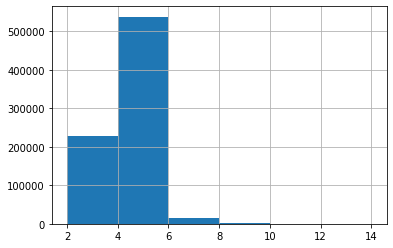

In [12]:
#average word length in query
query_df.text.str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins = [2,4,6,8,10,12,14])

In [13]:
corpus=[]
new=new_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict, Counter
dic=defaultdict(int)
for word in corpus:
  dic[word]+=1

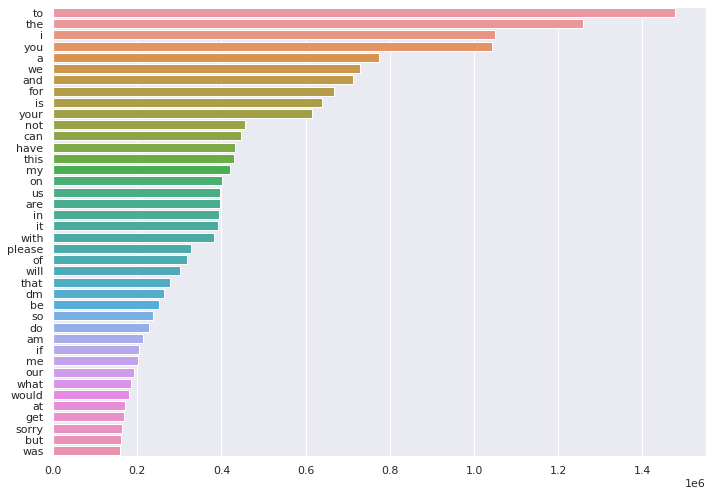

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
  x.append(word)
  y.append(count)
        
sns.barplot(x=y,y=x)

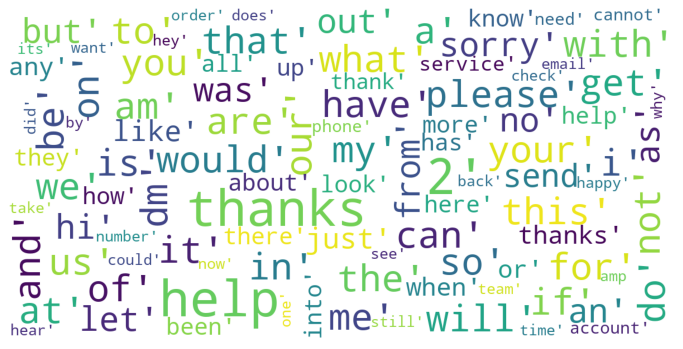

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(most[:300])

In [16]:
thresholdVal = 5000
query_df_filtered=query_df[query_df.groupby("customer_handle")["author_id"].transform('size')>=thresholdVal]

In [17]:
query_df_filtered.head()

,author_id,text,followup,solution,customer_handle
tweet_id,,,,,
8,115712,is the worst customer service,i would love the chance to review the account...,". can you please send us a private message, s...",sprintcare
18,115713,you all lie about your great connection. 5 bar...,h there! we would definitely like to work wit...,. we understand your concerns and we would li...,sprintcare
20,115715,"whenever i contact customer support, they tell...",please send me a private message so that i ca...,NaN,sprintcare
29,115716,actually that is a broken link you sent me and...,the information pertaining to the account ass...,. what information is incorrect? ^jk. our de...,Ask_Spectrum
31,115717,yo your customer service reps are super nice ...,"hello, my apologies for any frustrations or i...",NaN,Ask_Spectrum


In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.preprocessing import LabelEncoder
import os
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [19]:
pretrained_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
#pretrained_model_url = "https://tfhub.dev/google/nnlm-en-dim50/2"

In [20]:
hub_layer = hub.KerasLayer(pretrained_model_url, trainable=True, name='pre_trained_embedding')

In [21]:
from sklearn.model_selection import train_test_split
x = query_df_filtered['text'].values
y = query_df_filtered['customer_handle'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
total_categories = len(np.unique(y))

In [37]:
def plot_loss(train_history):
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('model_loss.pdf', bbox_inches='tight')
    plt.show()

def plot_accuracy(train_history):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('model_accuracy.pdf', bbox_inches='tight')
    plt.show()

In [23]:
def create_model():
  tf_model = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(), name='input_layer', dtype=tf.string),
      hub_layer,
      tf.keras.layers.Dense(300, activation='relu', name='clause_embedding'),
      tf.keras.layers.Dense(total_categories, activation='softmax')
  ])
  tf_model.compile(tf.keras.optimizers.Adam(2e-5), loss='categorical_crossentropy', metrics=["accuracy"])
  return tf_model

In [24]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_dummy = tf.keras.utils.to_categorical(y_train_encoded)
np.save('categories.npy', le.classes_)

y_test_encoded = le.transform(y_test)
y_test_dummy = tf.keras.utils.to_categorical(y_test_encoded)

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("sent_embeddings_clf.h5",
                                                monitor='val_accuracy',
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

In [26]:
# train classifier model
epochs = 10
batch_size=512
tf_model = create_model()
train_history = tf_model.fit(x_train,y_train_dummy,validation_data=(x_test, y_test_dummy),callbacks=[checkpoint], 
                             epochs=epochs,batch_size=batch_size)

Epoch 1/10
1073/1073 [==============================] - ETA: 0s - loss: 3.2986 - accuracy: 0.2243
Epoch 1: val_accuracy improved from -inf to 0.29426, saving model to sent_embeddings_clf.h5
1073/1073 [==============================] - 442s 403ms/step - loss: 3.2986 - accuracy: 0.2243 - val_loss: 2.8330 - val_accuracy: 0.2943
Epoch 2/10
1073/1073 [==============================] - ETA: 0s - loss: 2.5066 - accuracy: 0.3520
Epoch 2: val_accuracy improved from 0.29426 to 0.39714, saving model to sent_embeddings_clf.h5
1073/1073 [==============================] - 426s 397ms/step - loss: 2.5066 - accuracy: 0.3520 - val_loss: 2.2540 - val_accuracy: 0.3971
Epoch 3/10
1073/1073 [==============================] - ETA: 0s - loss: 2.0636 - accuracy: 0.4319
Epoch 3: val_accuracy improved from 0.39714 to 0.45234, saving model to sent_embeddings_clf.h5
1073/1073 [==============================] - 424s 395ms/step - loss: 2.0636 - accuracy: 0.4319 - val_loss: 1.9332 - val_accuracy: 0.4523
Epoch 4/10
10

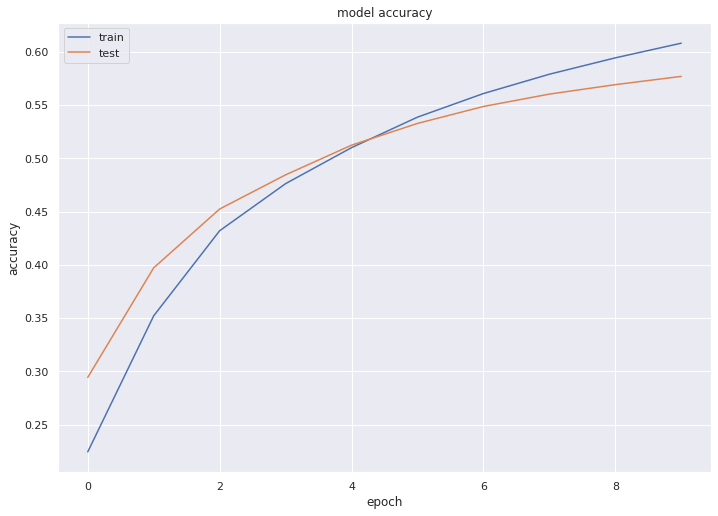

In [38]:
plot_accuracy(train_history)

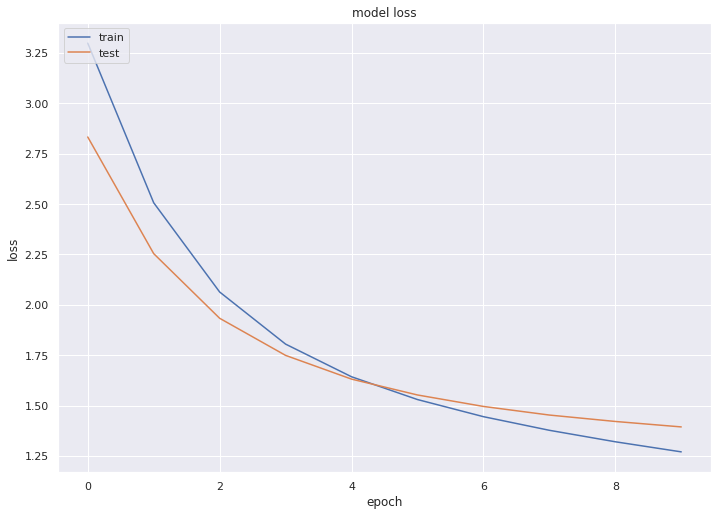

In [39]:
plot_loss(train_history)

In [29]:
predict_x = tf_model.predict(["my ipad is not working"])
cate = np.argmax(predict_x,axis=1)
le.inverse_transform(cate)

array(['AppleSupport'], dtype=object)

In [30]:
tf_model = create_model()
tf_model.load_weights("sent_embeddings_clf.h5")
tf_model.save('classification_model')

INFO:tensorflow:Assets written to: classification_model/assets


INFO:tensorflow:Assets written to: classification_model/assets


In [31]:
tf_model = tf.keras.models.load_model("classification_model")
le = LabelEncoder()
le.classes_ = np.load('categories.npy', allow_pickle=True)
predict_x = tf_model.predict(["my ipad is not working"])
cate = np.argmax(predict_x,axis=1)
le.inverse_transform(cate)

array(['AppleSupport'], dtype=object)

In [32]:
predict_x = tf_model.predict(x_test)
y_pred = np.argmax(predict_x,axis=1)
y_pred = le.inverse_transform(y_pred)

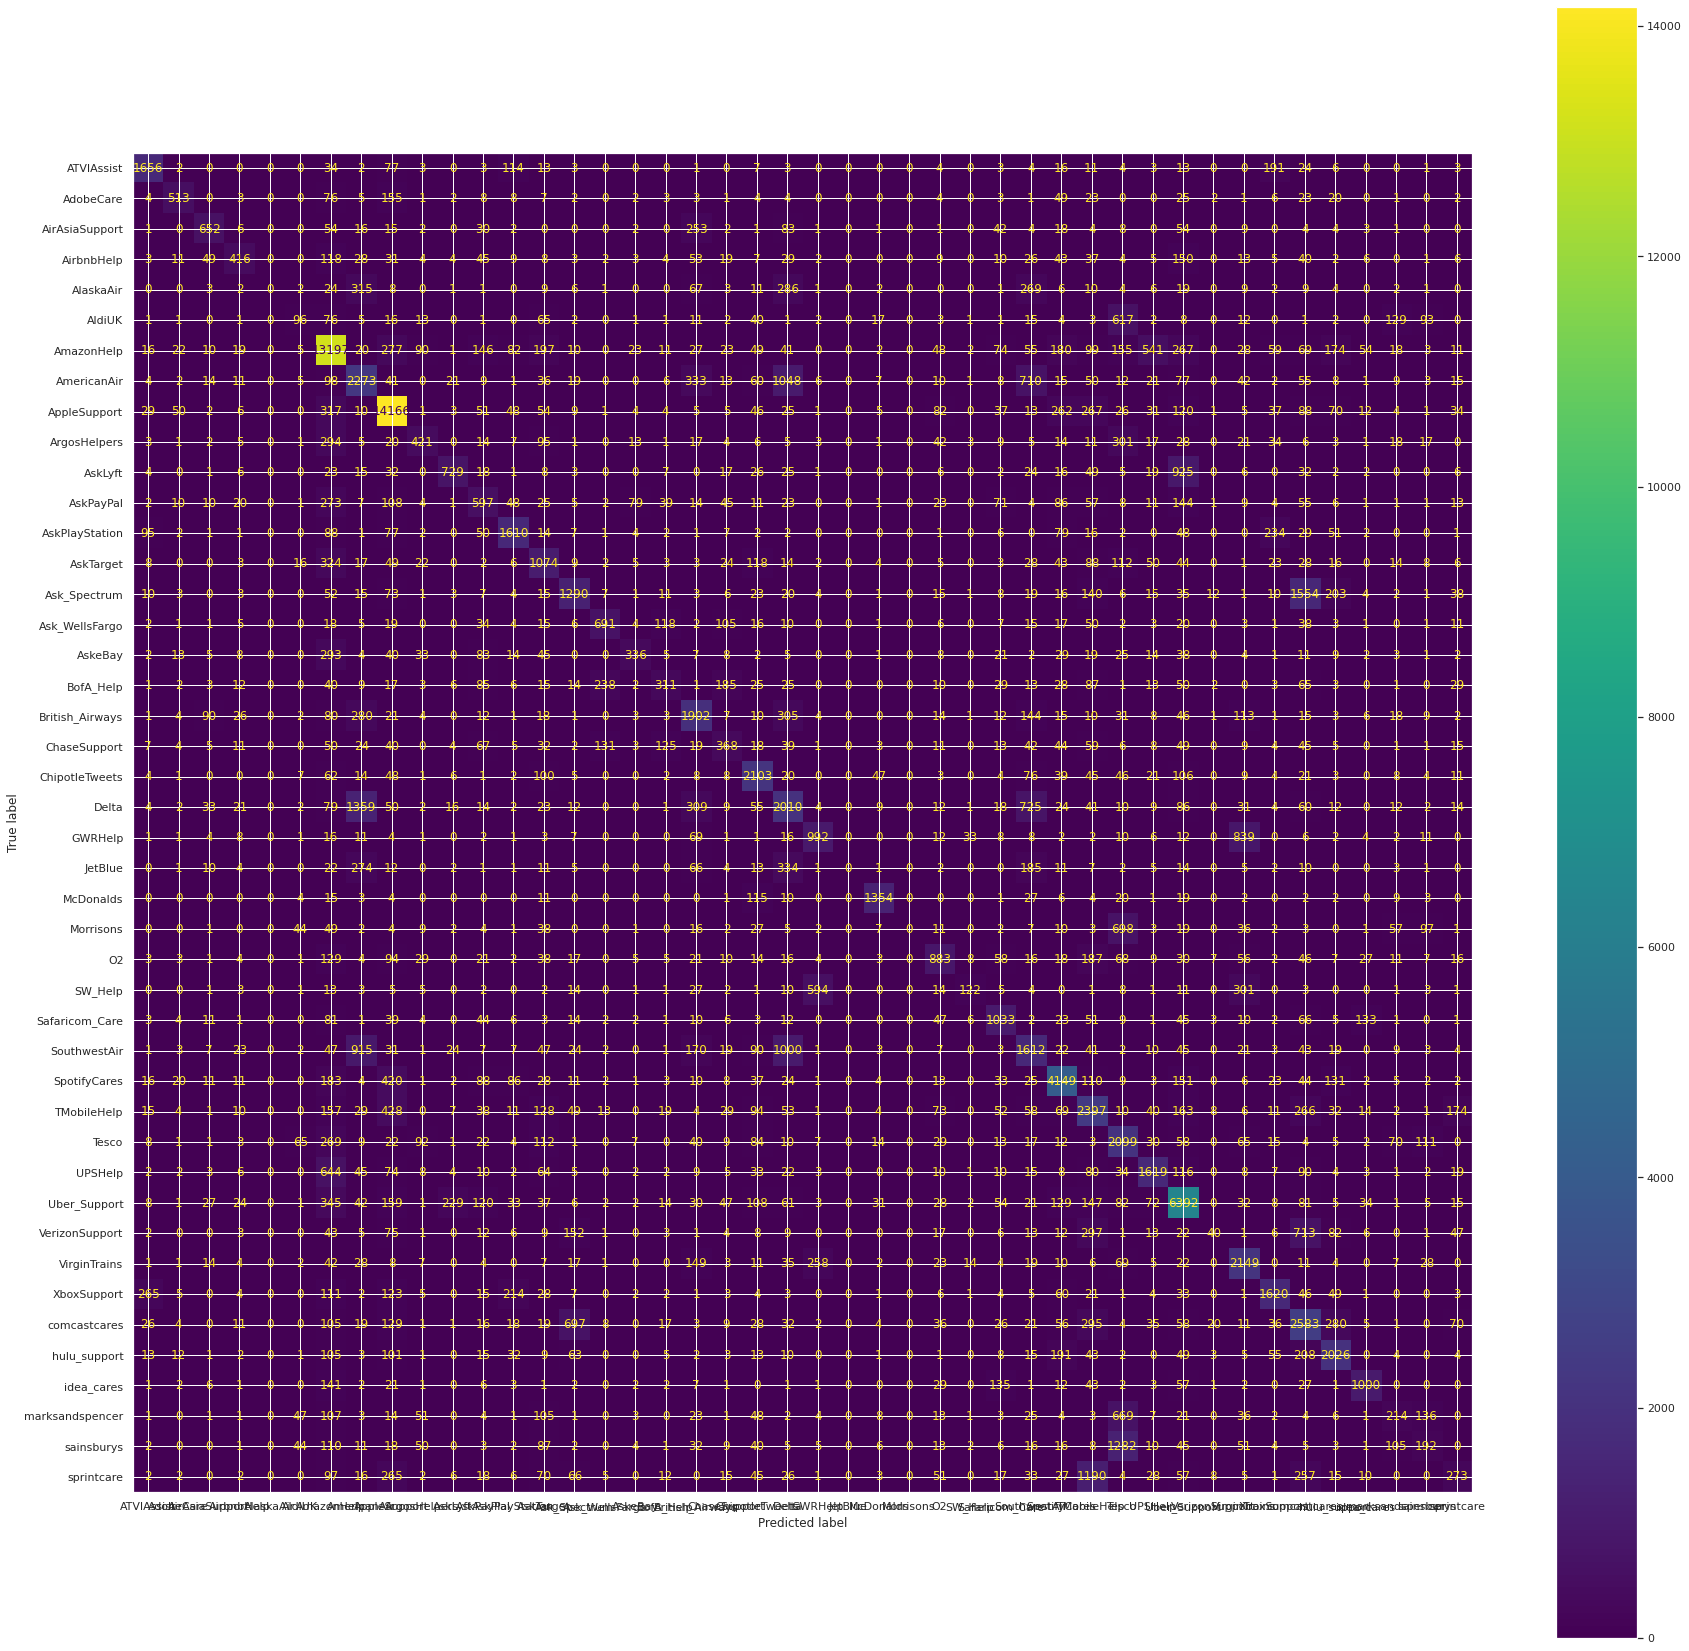

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(30, 30))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
cmp.plot(ax=ax)

plt.show()

In [34]:
pd.DataFrame(cm , columns=le.classes_, index=le.classes_).to_excel("confusion_metric.xlsx")

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose().to_excel("classification_report.xlsx")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.5556963744007889